In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier


In [3]:
iris=load_iris()
X=iris.data
y=iris.target

In [4]:
from sklearn.grid_search import GridSearchCV


In [6]:
krange=list(range(1,31))
print krange

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [8]:
param_grid=dict(n_neighbors=krange)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [9]:
knn=KNeighborsClassifier(n_neighbors=5)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [10]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [11]:
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [12]:
grid_mean_scores=[x.mean_validation_score for x in grid.grid_scores_]

In [13]:
print grid_mean_scores

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

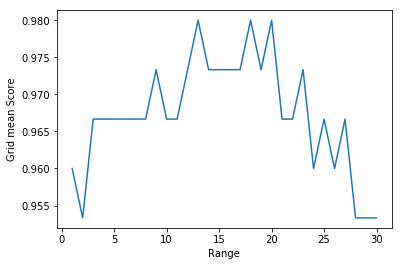

In [15]:
plt.plot(krange,grid_mean_scores)
plt.xlabel("Range")
plt.ylabel("Grid mean Score")
plt.show()

In [16]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [17]:
#Searching Multiple parameter

In [18]:
krange=list(range(1,31))
weight_options=['uniform','distance']

In [22]:
param_grid=dict(n_neighbors=krange,weights=weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [23]:
grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [24]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [28]:
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1, 'weights': 'uniform'}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [29]:
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [30]:
grid.predict([[1,2,3,4]])

array([1])

In [31]:
from sklearn.grid_search import RandomizedSearchCV

In [33]:
rand=RandomizedSearchCV(knn,param_grid,cv=10,scoring="accuracy",n_iter=10,random_state=5)
rand.fit(X,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 22, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 18, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 27, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 29, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 22, 'weights': 'distance'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14, 'weights': 'uniform'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 12, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15, 'weights': 'uniform'}]

In [34]:
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 18, 'weights': 'uniform'}


In [37]:
best_scores=[]
for x in range(20):
    rand=RandomizedSearchCV(knn,param_grid,cv=10,scoring="accuracy",n_iter=10)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_,3))
    
print best_scores

[0.98, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.973, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98]
